In [1]:
#importing libraries
import pandas as pd
import numpy as np
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

In [228]:
#Read in data
train = pd.read_csv("C:/Users/Amulya/Downloads/Analytics_Vidhya_Hackathon/train.csv", delimiter = ",")
test = pd.read_csv("C:/Users/Amulya/Downloads/Analytics_Vidhya_Hackathon/test.csv", delimiter = ",")
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


# Data wrangling

In [224]:
#finding missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Credit_Product,29325,0.119341
Is_Lead,0,0.000000
Is_Active,0,0.000000
Avg_Account_Balance,0,0.000000
Vintage,0,0.000000
Channel_Code,0,0.000000
Occupation,0,0.000000
Region_Code,0,0.000000
Age,0,0.000000
Gender,0,0.000000


In [225]:
#missing data
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing_datatest = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_datatest.head(20)

,Total,Percent
Credit_Product,12522,0.118904
Is_Active,0,0.000000
Avg_Account_Balance,0,0.000000
Vintage,0,0.000000
Channel_Code,0,0.000000
Occupation,0,0.000000
Region_Code,0,0.000000
Age,0,0.000000
Gender,0,0.000000
ID,0,0.000000


In [226]:
train.nunique()

ID                     245725
Gender                      2
Age                        63
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance    135292
Is_Active                   2
Is_Lead                     2
dtype: int64

In [227]:
test.nunique()

ID                     105312
Gender                      2
Age                        62
Region_Code                35
Occupation                  4
Channel_Code                4
Vintage                    66
Credit_Product              2
Avg_Account_Balance     78315
Is_Active                   2
dtype: int64

Table to study relationship between various columns and the target

In [99]:
print( train.pivot_table(index='Occupation',values='Is_Lead',aggfunc=('mean','count')) )

                  count      mean
Occupation                       
Entrepreneur     2667.0  0.660667
Other           70173.0  0.244952
Salaried        71999.0  0.159669
Self_Employed  100886.0  0.275965


In [89]:
print( train.pivot_table(index='Channel_Code',values='Is_Lead',aggfunc=('mean','count')) )

                 count      mean
Channel_Code                    
X1            103718.0  0.091421
X2             67726.0  0.327895
X3             68712.0  0.367025
X4              5569.0  0.247800


In [94]:
print( train.pivot_table(index='Credit_Product',values='Is_Lead',aggfunc=('mean','count')) )

                   count      mean
Credit_Product                    
No              144357.0  0.073588
Yes              72043.0  0.314951


In [90]:
print( train.pivot_table(index='Is_Active',values='Is_Lead',aggfunc=('mean','count')) )

              count      mean
Is_Active                    
No         150290.0  0.208151
Yes         95435.0  0.282967


In [92]:
print( train.pivot_table(index='Gender',values='Is_Lead',aggfunc=('mean','count')) )

           count      mean
Gender                    
Female  111528.0  0.203581
Male    134197.0  0.265155


In [96]:
print( train.pivot_table(index='Age',values='Is_Lead',aggfunc=('mean','count')) )

       count      mean
Age                   
23       1.0  0.000000
24    1905.0  0.058268
25    5307.0  0.069154
26    9039.0  0.065383
27   13005.0  0.063206
..       ...       ...
81     830.0  0.326506
82     749.0  0.340454
83     694.0  0.328530
84     624.0  0.342949
85     604.0  0.332781

[63 rows x 2 columns]


In [97]:
print( train.pivot_table(index='Vintage',values='Is_Lead',aggfunc=('mean','count')) )

           count      mean
Vintage                   
7          648.0  0.226852
8          619.0  0.218094
9          638.0  0.231975
13       12338.0  0.149052
14       12267.0  0.147061
...          ...       ...
128        501.0  0.375250
129        499.0  0.326653
133         18.0  0.166667
134         14.0  0.428571
135         19.0  0.210526

[66 rows x 2 columns]


In [98]:
print( train.pivot_table(index='Region_Code',values='Is_Lead',aggfunc=('mean','count')) )

               count      mean
Region_Code                   
RG250         2496.0  0.157452
RG251         5950.0  0.232101
RG252         4286.0  0.138124
RG253         1858.0  0.258881
RG254        26840.0  0.212854
RG255         2018.0  0.232408
RG256         2847.0  0.140850
RG257         6101.0  0.191772
RG258         1951.0  0.220400
RG259         2586.0  0.193735
RG260         3110.0  0.190997
RG261         7633.0  0.167955
RG262         1788.0  0.180649
RG263         3687.0  0.221861
RG264         2793.0  0.137129
RG265         1546.0  0.258732
RG266         1578.0  0.139417
RG267         1497.0  0.148965
RG268        35934.0  0.299800
RG269         7863.0  0.221671
RG270         7720.0  0.144301
RG271         1542.0  0.169261
RG272         5252.0  0.219916
RG273         4497.0  0.237714
RG274         5286.0  0.164964
RG275         3245.0  0.167334
RG276         2764.0  0.277858
RG277        12826.0  0.231951
RG278         1822.0  0.219539
RG279         3976.0  0.225604
RG280   

In [100]:
print( train.pivot_table(index='Avg_Account_Balance',values='Is_Lead',aggfunc=('mean','count')) )

                     count  mean
Avg_Account_Balance             
20790                  1.0   0.0
45657                  1.0   0.0
45950                  2.0   0.5
47526                  1.0   0.0
48389                  2.0   0.0
...                    ...   ...
9546317                1.0   0.0
9614883                1.0   0.0
9792796                1.0   1.0
10007678               1.0   1.0
10352009               1.0   0.0

[135292 rows x 2 columns]


Outlier detection

<AxesSubplot:ylabel='Age'>

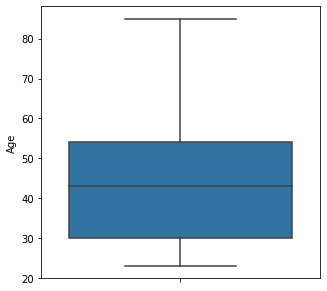

In [15]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Age',data=train)

<AxesSubplot:ylabel='Vintage'>

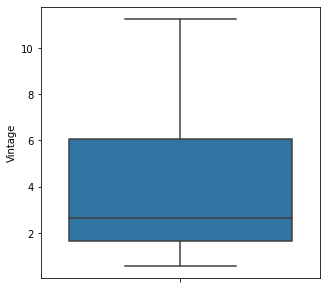

In [16]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Vintage',data=train)

<AxesSubplot:ylabel='Avg_Account_Balance'>

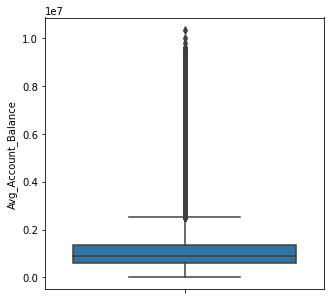

In [17]:
plt.figure(figsize=(5,5))
sns.boxplot(y='Avg_Account_Balance',data=train)

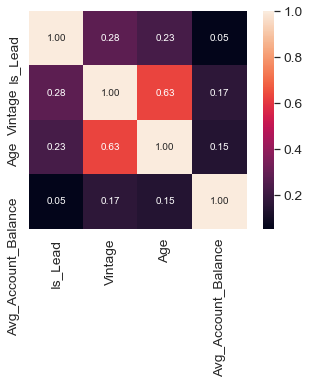

In [95]:
# correlation matrix
corrmat = train.corr()
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Is_Lead')['Is_Lead'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [239]:
Normalising the numericl columns

SyntaxError: invalid syntax (<ipython-input-239-10adc6700194>, line 1)

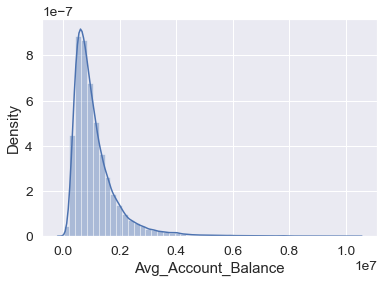

In [217]:
sns.distplot(train['Avg_Account_Balance'])
plt.show()

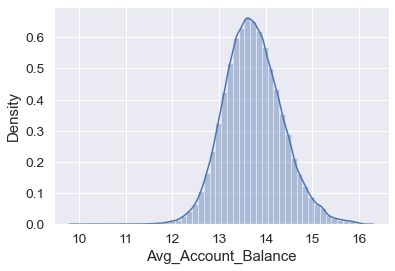

In [229]:
train['Avg_Account_Balance'] = np.log(train['Avg_Account_Balance'])
sns.distplot(train['Avg_Account_Balance'])
plt.show()

In [231]:
#train['Age'] = np.log(train['Age'])
#test['Age'] = np.log(test['Age'])
#train['Vintage'] = np.log(train['Vintage'])
#test['Vintage'] = np.log(test['Vintage'])
train['Vintage'] = train['Vintage']/12
test['Vintage'] = test['Vintage']/12

Filling Null values

In [230]:
train['Credit_Product'].replace(np.nan,'Yes',inplace=True)
test['Credit_Product'].replace(np.nan,'Yes',inplace=True)

test['Avg_Account_Balance'] = np.log(test['Avg_Account_Balance'])

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   245725 non-null  object 
 1   Gender               245725 non-null  object 
 2   Age                  245725 non-null  int64  
 3   Region_Code          245725 non-null  object 
 4   Occupation           245725 non-null  object 
 5   Channel_Code         245725 non-null  object 
 6   Vintage              245725 non-null  int64  
 7   Credit_Product       245725 non-null  object 
 8   Avg_Account_Balance  245725 non-null  float64
 9   Is_Active            245725 non-null  object 
 10  Is_Lead              245725 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 20.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
-

In [232]:
#Deleting unnecessary columns 
train = train.drop(["ID"],axis=1)
test1 = test.drop(["ID"],axis=1)

Converting categrical values to numerical for model building

In [233]:
s = (train.dtypes == 'object')
r = (test1.dtypes == 'object')
object_cols = list(s[s].index)
object_cols = list(r[r].index)
label_encoder = LabelEncoder()
for col in object_cols:
    train[col] = label_encoder.fit_transform(train[col])
    test1[col] = label_encoder.fit_transform(test1[col])
    
train.info()
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Gender               245725 non-null  int32  
 1   Age                  245725 non-null  int64  
 2   Region_Code          245725 non-null  int32  
 3   Occupation           245725 non-null  int32  
 4   Channel_Code         245725 non-null  int32  
 5   Vintage              245725 non-null  float64
 6   Credit_Product       245725 non-null  int32  
 7   Avg_Account_Balance  245725 non-null  float64
 8   Is_Active            245725 non-null  int32  
 9   Is_Lead              245725 non-null  int64  
dtypes: float64(2), int32(6), int64(2)
memory usage: 13.1 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105312 entries, 0 to 105311
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0  

# Model Building 

In [234]:

X = train.drop(["Is_Lead"],axis=1)
Y = train['Is_Lead']
X1 = test1


X_train, X_test, Y_train, Y_test = train_test_split(X, X, test_size=0.2, random_state=3)


Hyperparameter tuning for LGB

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, make_scorer, accuracy_score, roc_curve
import optuna
from math import sqrt
import lightgbm as lgb

lgb_train = lgb.Dataset(X_train, Y_train)
lgb_valid = lgb.Dataset(X_test, Y_test, reference=lgb_train)


In [ ]:
def objective(trial):    
    params = {
        'reg_alpha' : trial.suggest_loguniform('reg_alpha' , 1e-5 , 12),
        'reg_lambda' : trial.suggest_loguniform('reg_lambda' , 1e-5 , 12),
        'num_leaves' : trial.suggest_int('num_leaves' , 11 , 900),
        'learning_rate' : trial.suggest_uniform('learning_rate' , 0.0000001 , 0.2),
        'max_depth' : trial.suggest_int('max_depth' , 5 , 400),
        'n_estimators' : trial.suggest_int('n_estimators' , 1 , 9999),
        'min_child_samples' : trial.suggest_int('min_child_samples' , 1 , 110),
        'min_child_weight' : trial.suggest_loguniform('min_child_weight' , 1e-5 , 1),
        'subsample' : trial.suggest_uniform('subsample' , 1e-5 , 1.0),
        'colsample_bytree' : trial.suggest_loguniform('colsample_bytree' , 1e-5 , 1),
        'random_state' : trial.suggest_categorical('random_state' , [2,22,222,2222]),
        'metric' : 'auc',
    }
    
    model = lgb.LGBMClassifier(**params)
    model.fit(X_train , Y_train , eval_set = [(X_test , Y_test)] ,eval_metric='logloss', early_stopping_rounds = 1000 , \
             verbose = False)
    preds = model.predict(X_test)
    acc = metrics.accuracy_score(Y_test , preds)
    return acc

In [ ]:
study = optuna.create_study(direction = 'maximize')
study.optimize(objective, n_trials = 100)

print('numbers of the finished trials:' , len(study.trials))
print('the best params:' , study.best_trial.params)
print('the best value:' , study.best_value)


In [235]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import roc_auc_score

def cross_val(X, Y, model, params, folds=10):

    skf = StratifiedKFold(n_splits=folds, shuffle=True, random_state=42)
    for fold, (train_idx, test_idx) in enumerate(skf.split(X, Y)):
        print(f"Fold: {fold}")
        x_train, y_train = X.iloc[train_idx], Y.iloc[train_idx]
        x_test, y_test = X.iloc[test_idx], Y.iloc[test_idx]

        alg = model(**params)
        alg.fit(x_train, y_train,
                eval_set=[(x_test, y_test)],
                early_stopping_rounds=100,
                verbose=400)

        pred = alg.predict_proba(x_test)[:, 1]
        roc_score = roc_auc_score(y_test, pred)
        print(f"roc_auc_score: {roc_score}")
        print("-"*50)
    
    return alg

In [236]:
lgb_params= {'learning_rate': 0.045, 
             'n_estimators': 20000, 
             'max_bin': 94,
             'num_leaves': 10, 
             'max_depth': 27, 
             'reg_alpha': 8.457, 
             'reg_lambda': 6.853, 
             'subsample': 0.749}

In [237]:
from lightgbm import LGBMClassifier
lgb_model = cross_val(X,Y, LGBMClassifier, lgb_params)

Fold: 0
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.381021
Early stopping, best iteration is:
[547]	valid_0's binary_logloss: 0.380875
roc_auc_score: 0.8505868443922527
--------------------------------------------------
Fold: 1
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.380914
Early stopping, best iteration is:
[565]	valid_0's binary_logloss: 0.380824
roc_auc_score: 0.8519260731970857
--------------------------------------------------
Fold: 2
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.382768
[800]	valid_0's binary_logloss: 0.382555
Early stopping, best iteration is:
[882]	valid_0's binary_logloss: 0.382516
roc_auc_score: 0.8507886634205017
--------------------------------------------------
Fold: 3
Training until validation scores don't improve for 100 rounds
[400]	valid_0's binary_logloss: 0.382013
Early stopping, best iteration i

In [238]:
Predsl = lgb_model.predict_proba(X1)[:,1]
submission = pd.DataFrame({'ID':test['ID'], 'Is_Lead':Predsl})
filename = "C:/Users/Amulya/Downloads/Analytics_Vidhya_Hackathon/predictionsLGB9.csv"
submission.to_csv(filename, index = False)